# Creating plots to illustrate cell fate

In [278]:
import matplotlib.pyplot as plt
import pandas as pd
import btrack
import napari
import numpy as np
from tqdm.auto import tqdm
from macrohet import dataio, tile, tools, animate
import seaborn as sns
import math

def calc_eccentricity(major_axis, minor_axis):
    """
    Calculates the eccentricity of an object given its major and minor axis
    lengths
    """
    if major_axis < minor_axis:
        major_axis, minor_axis = minor_axis, major_axis # swap if major axis is smaller
    eccentricity = math.sqrt(1 - (minor_axis**2 / major_axis**2))
    return eccentricity

scale_factor = 6048/1200

def highlight_cell(cell_ID, viewer = viewer, tracks = tracks,
                   scale_factor = 6048/1200):
    track = [track for track in tracks if track.ID == cell_ID][0]
    points = [[track.t[i], track.y[i]*scale_factor, track.x[i]*scale_factor]
               for i in range(len(track))]
    viewer.add_points(points, size = 300,
                      face_color = 'transparent',
                      edge_color = 'white',
                      edge_width = 0.1,
                      name = f'cell {cell_ID}', scale = napari_scale)
    viewer.dims.current_step = (points[0])

In [274]:
points[0][0]

0

## Load data

Begin with experiment metadata then use that information to load all tracks for each assay


In [3]:
image_dir = '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/'
image_metadata_fn = '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Index.idx.xml'
metadata = dataio.read_harmony_metadata(image_metadata_fn)
assay_layout_metadata = '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Assaylayout/20210602_Live_cell_IPSDMGFP_ATB.xml'
assay_layout = dataio.read_harmony_metadata(assay_layout_metadata, assay_layout=True)
assay_layout

Reading metadata XML file...


Extracting HarmonyV5 metadata:   0%|          | 0/113400 [00:00<?, ?it/s]

Extracting metadata complete!
Reading metadata XML file...
Extracting metadata complete!


Strain Compound Concentration ConcentrationEC
3 4    RD1     CTRL             0             EC0
  5     WT     CTRL             0             EC0
  6     WT      PZA            60            EC50
  7     WT      RIF           0.1            EC50
  8     WT      INH          0.04            EC50
  9     WT      BDQ          0.02            EC50
4 4    RD1     CTRL             0             EC0
  5     WT     CTRL             0             EC0
  6     WT      PZA            60            EC50
  7     WT      RIF           0.1            EC50
  8     WT      INH          0.04            EC50
  9     WT      BDQ          0.02            EC50
5 4    RD1     CTRL             0             EC0
  5     WT     CTRL             0             EC0
  6     WT      PZA           400            EC99
  7     WT      RIF             2            EC99
  8     WT      INH             2            EC99
  9     WT      BDQ           2.5            EC99
6 4    RD1     CTRL             0             EC0
  5     WT     CTRL             0             EC0
  6     WT      PZA           400            EC99
  7     WT      RIF             2            EC99
  8     WT      INH             2            EC99
  9     WT      BDQ           2.5            EC99

## Load tracks

In [4]:
tracks_dict = dict()
segmentation_dict = dict()
### iterate over all experimental conditions
for (row, column), info in tqdm(assay_layout.iterrows(), 
                                desc = 'Progress through positions',
                                total = len(assay_layout)):
    ### load tracks
    with btrack.dataio.HDF5FileHandler(
            f'/mnt/DATA/macrohet/labels/full_localisation/({row},{column}).h5',#
            'r', 
            obj_type = 'obj_type_1', 
            ) as hdf: 
            tracks = hdf.tracks
            seg = hdf.segmentation
            
    tracks_dict[(row, column)] = tracks
    segmentation_dict[(row, column)] = seg


Progress through positions:   0%|          | 0/24 [00:00<?, ?it/s]

[INFO][2023/03/16 11:30:55 AM] Opening HDF file: /mnt/DATA/macrohet/labels/full_localisation/(3,4).h5...
[INFO][2023/03/16 11:30:55 AM] Loading tracks/obj_type_1
[INFO][2023/03/16 11:30:55 AM] Loading LBEP/obj_type_1
[INFO][2023/03/16 11:30:55 AM] Loading objects/obj_type_1 (25554, 5) (25554 filtered: None)
[INFO][2023/03/16 11:30:56 AM] Loading segmentation (75, 1200, 1200)
[INFO][2023/03/16 11:30:56 AM] Closing HDF file: /mnt/DATA/macrohet/labels/full_localisation/(3,4).h5
[INFO][2023/03/16 11:30:56 AM] Opening HDF file: /mnt/DATA/macrohet/labels/full_localisation/(3,5).h5...
[INFO][2023/03/16 11:30:56 AM] Loading tracks/obj_type_1
[INFO][2023/03/16 11:30:56 AM] Loading LBEP/obj_type_1
[INFO][2023/03/16 11:30:56 AM] Loading objects/obj_type_1 (26917, 5) (26917 filtered: None)
[INFO][2023/03/16 11:30:57 AM] Loading segmentation (75, 1200, 1200)
[INFO][2023/03/16 11:30:57 AM] Closing HDF file: /mnt/DATA/macrohet/labels/full_localisation/(3,5).h5
[INFO][2023/03/16 11:30:57 AM] Opening H

[INFO][2023/03/16 11:31:18 AM] Loading tracks/obj_type_1
[INFO][2023/03/16 11:31:18 AM] Loading LBEP/obj_type_1
[INFO][2023/03/16 11:31:18 AM] Loading objects/obj_type_1 (22122, 5) (22122 filtered: None)
[INFO][2023/03/16 11:31:20 AM] Loading segmentation (75, 1200, 1200)
[INFO][2023/03/16 11:31:20 AM] Closing HDF file: /mnt/DATA/macrohet/labels/full_localisation/(5,9).h5
[INFO][2023/03/16 11:31:20 AM] Opening HDF file: /mnt/DATA/macrohet/labels/full_localisation/(6,4).h5...
[INFO][2023/03/16 11:31:20 AM] Loading tracks/obj_type_1
[INFO][2023/03/16 11:31:20 AM] Loading LBEP/obj_type_1
[INFO][2023/03/16 11:31:20 AM] Loading objects/obj_type_1 (24744, 5) (24744 filtered: None)
[INFO][2023/03/16 11:31:21 AM] Loading segmentation (75, 1200, 1200)
[INFO][2023/03/16 11:31:21 AM] Closing HDF file: /mnt/DATA/macrohet/labels/full_localisation/(6,4).h5
[INFO][2023/03/16 11:31:21 AM] Opening HDF file: /mnt/DATA/macrohet/labels/full_localisation/(6,5).h5...
[INFO][2023/03/16 11:31:21 AM] Loading t

## Isolate two experiments

In [9]:
RD1_tracks = tracks_dict[(3,4)]
CTRL_tracks = tracks_dict[(3,5)]

# View tracks

In [6]:
row, column = (3,5)
images = tile.compile_mosaic(
                             image_dir, 
                             metadata, 
                             row, 
                             column, 
                             set_plane = 'sum_proj',
                             ).astype(np.uint16)

In [7]:
images

,Array,Chunk
Bytes,10.22 GiB,15.50 MiB
Shape,"(75, 2, 6048, 6048)","(1, 2, 2016, 2016)"
Count,16875 Tasks,675 Chunks
Type,uint16,numpy.ndarray


In [8]:
%%time
images = images.compute().compute()

CPU times: user 3h 41min 53s, sys: 8min 35s, total: 3h 50min 28s
Wall time: 8min 39s


### Filter some tracks

In [23]:
filt_CTRL_tracks = [track for track in CTRL_tracks if len(track) > 74]
semi_filt_CTRL_tracks = [track for track in CTRL_tracks if 74>len(track) > 34]

In [37]:
filt_tracks, properties, graph = btrack.utils.tracks_to_napari(filt_CTRL_tracks, ndim = 2)
filt_tracks = tools.scale_napari_tracks(filt_tracks)
semi_filt_tracks, properties, graph = btrack.utils.tracks_to_napari(semi_filt_CTRL_tracks, ndim = 2)
semi_filt_tracks = tools.scale_napari_tracks(semi_filt_tracks)
#tracks = scale_napari_tracks(tracks)


In [169]:
napari_tracks, properties, graph = btrack.utils.tracks_to_napari(tracks, ndim = 2)
napari_tracks = tools.scale_napari_tracks(napari_tracks)

In [34]:
import seaborn as sns

(0.0, 200.0)

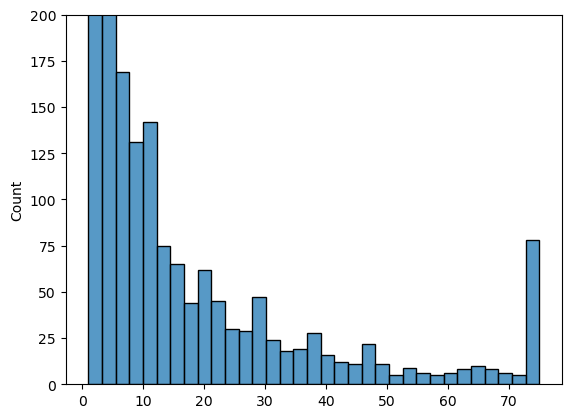

In [36]:
# what do the distribution of track lengths look like?
sns.histplot([len(track) for track in CTRL_tracks])
plt.ylim(0,200)

In [171]:
napari_scale = [float('%.5g' % float(metadata.ImageResolutionX[0])), 
                float('%.5g' % float(metadata.ImageResolutionY[0]))]
### add exaggerated time scale
napari_scale = [1.49E-5, 1.4949e-07, 1.4949e-07]

In [206]:
viewer = napari.Viewer()
# viewer.theme = 'dark'

# viewer.add_tracks(filt_tracks, name = 'FILTERED tracks', 
#                   blending='additive', scale = napari_scale)
# viewer.add_tracks(filt_tracks, name = 'semi filtered tracks', 
#                   blending='additive', scale = napari_scale)
viewer.add_image(images, 
                 channel_axis = 1, 
                 colormap= ['green', 'magenta'], 
                 contrast_limits= [[0,6000], [0, 2000]],
                 blending = ['translucent', 'additive'],
                 scale = napari_scale, 
#                 visible=False
                )
viewer.add_tracks(napari_tracks, name = '34 and up tracks', 
                  blending='additive', scale = napari_scale)


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Tracks layer '34 and up tracks' at 0x7f5936cfd850>

# Build plot 

Filter tracks above half the length

Need to create a function that extracts cell fate from obvious markers... does the cell leave the FOV? etc.

In [10]:
tracks = [track for track in CTRL_tracks if len(track) > 34]

In [97]:
track_614 = [track for track in tracks if track.ID == 614][0]
track_614

,ID,t,x,y,z,parent,root,state,generation,dummy,minor_axis_length,major_axis_length,mean_intensity-1,orientation,mean_intensity-0,area
0,614,3,557.928284,58.785751,0.0,284,284,5,1,False,37.603077,69.015617,0.005601,0.321055,0.019273,2021.0
1,614,4,560.028809,61.425220,0.0,284,284,5,1,False,39.695827,67.239677,0.005638,0.205167,0.021502,2046.0
2,614,5,561.897461,58.888279,0.0,284,284,5,1,False,32.469704,67.740746,0.005593,0.365972,0.020502,1638.0
3,614,6,562.995178,66.671616,0.0,284,284,5,1,False,46.071316,65.002609,0.005587,0.392399,0.018807,2290.0
4,614,7,565.227722,68.514015,0.0,284,284,5,1,False,41.832829,63.852623,0.005595,0.385867,0.020484,1998.0
5,614,8,567.250916,64.761192,0.0,284,284,5,1,False,34.718990,81.530327,0.005583,0.571456,0.019290,2144.0
6,614,9,566.134094,62.961433,0.0,284,284,5,1,False,35.330032,80.907928,0.005626,0.532330,0.024114,2178.0
7,614,10,568.632446,68.461647,0.0,284,284,5,1,False,39.287746,91.556129,0.005630,0.591701,0.019047,2764.0
8,614,11,572.681763,70.615387,0.0,284,284,5,1,False,32.202629,64.151543,0.005667,0.612151,0.021359,1612.0
9,614,12,569.190857,68.788437,0.0,284,284,5,1,False,38.771870,69.984909,0.005701,0.587746,0.016704,2075.0


In [15]:
len(tracks)

265

In [109]:
track_614.eccentricity = [calc_eccentricity(track_614.properties['major_axis_length'][i],
                                           track_614.properties['minor_axis_length'][i]) 
                          for i in range(len(track_614))]

<AxesSubplot:>

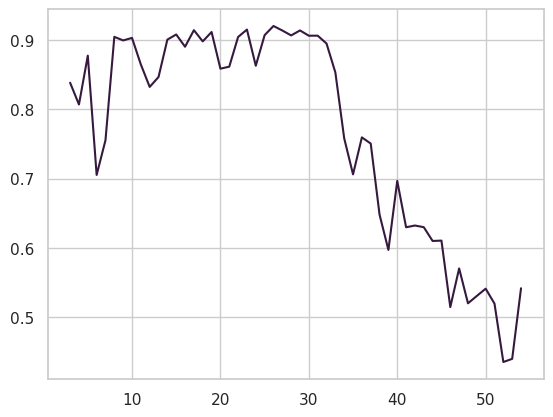

In [110]:
sns.lineplot(x = track_614.t, y = track_614.eccentricity)


In [120]:
{track.ID:[calc_eccentricity(track.properties['major_axis_length'][i],
                                  track.properties['minor_axis_length'][i]) 
                          for i in range(len(track))] for track in tracks}

{311: [0.6300866302875615,
  0.7772141243127223,
  0.5996038527990056,
  0.5481143158360369,
  0.5198633838094081,
  0.5347450717485774,
  0.21983904743332,
  0.44415173272941383,
  0.7125415429991605,
  0.6456439496170167,
  0.49657381864220485,
  0.3329687842970632,
  0.4819075692140923,
  0.39543743756385435,
  0.6242300344453278,
  0.6631127260316536,
  0.7222973715238091,
  0.6385584815152091,
  0.7396355826481461,
  0.5271322097364539,
  0.6047247704165576,
  0.69169739601209,
  0.7532842596102072,
  0.7411897361740322,
  0.649613623612003,
  0.7591705479147703,
  0.8151502460762237,
  0.8130909356294083,
  0.8136881247354553,
  0.845898888051415,
  0.8174729652045335,
  0.8498227133697926,
  0.8007640523785223,
  0.7046709633270642,
  nan,
  nan,
  nan,
  0.8023177503842017,
  0.8894120297571312,
  0.7055824382412522,
  nan,
  0.6124924299294646,
  0.8533648637851847,
  0.8479409278631855,
  0.48678359201314836,
  nan,
  0.45541108615362086,
  nan,
  0.8254699061369005,
  0.5707

In [126]:
eccentricity = pd.DataFrame.from_dict({track.ID:[calc_eccentricity(track.properties['major_axis_length'][i],
                                  track.properties['minor_axis_length'][i]) 
                          for i in range(len(track))] for track in tracks}, 
                           orient = 'index', 
                                     )

In [125]:
len([track.ID for track in tracks])

265

In [127]:
eccentricity

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
311,0.630087,0.777214,0.599604,0.548114,0.519863,0.534745,0.219839,0.444152,0.712542,0.645644,...,0.579060,0.611956,0.595528,0.544037,0.547411,0.509469,0.481300,0.694586,0.574261,0.180946
307,0.314881,0.689629,0.858924,0.490506,0.903786,0.887019,0.817788,0.842659,0.944315,0.856596,...,0.926897,0.918614,0.945683,0.955023,0.943374,0.955122,0.970072,0.957074,0.951177,0.973811
304,0.811731,0.864811,0.880473,0.870138,0.901029,0.901632,0.917847,0.906892,0.926218,0.923094,...,0.955552,NaN,0.944124,0.947188,0.947866,0.952837,0.956127,0.958824,0.944165,0.952074
303,0.954226,0.966488,0.920757,0.893347,0.959081,NaN,0.902570,0.904667,0.909789,0.868763,...,0.806517,0.652589,0.780175,0.755850,0.521818,0.799664,0.742991,0.772783,NaN,NaN
298,0.713919,0.843664,0.905994,0.940659,0.925581,0.871593,0.911158,0.885551,NaN,0.953111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,0.860625,0.759467,0.649219,0.873908,0.582374,0.903623,0.863895,0.899718,0.747051,0.878890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2048,0.894554,NaN,0.903391,0.920521,0.917090,0.889431,0.875113,0.863509,0.880190,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2094,0.955754,NaN,0.948445,NaN,0.949063,NaN,0.941292,NaN,0.959397,0.963740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2099,0.636750,0.836720,NaN,0.622427,0.689193,0.762716,0.769239,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0it [00:00, ?it/s]

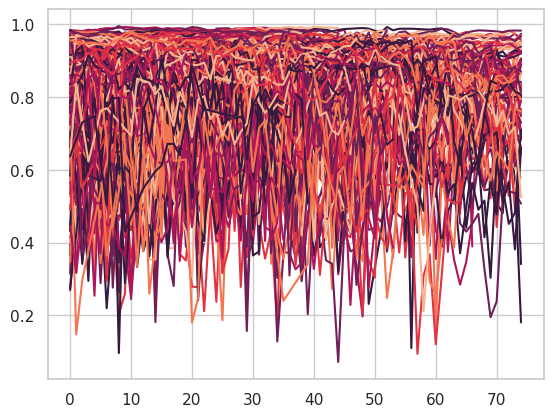

In [139]:
for row in tqdm(eccentricity.iterrows()):
    sns.lineplot(x = row[1].index, 
                   y = row[1].values)

RangeIndex(start=0, stop=75, step=1)

<AxesSubplot:>

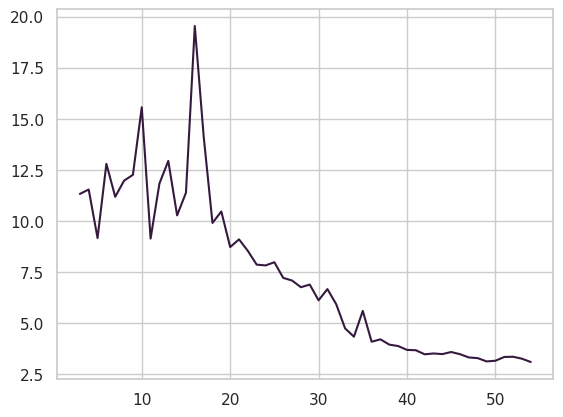

In [102]:
sns.lineplot(x = track_614.t, y = track_614.properties['mean_intensity-1']*track_614.properties['area'])


<AxesSubplot:>

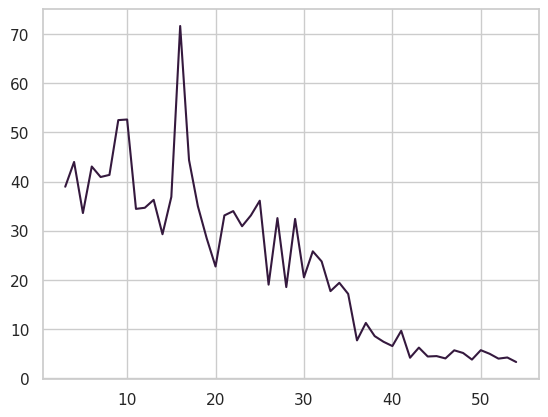

In [103]:
sns.lineplot(x = track_614.t, y = track_614.properties['mean_intensity-0']*track_614.properties['area'])

# Estimating cell fate

In [ ]:
track for track in tracks if 

In [302]:
len(tracks)

265

  0%|          | 0/265 [00:00<?, ?it/s]

(0.0, 1200.0, 0.0, 1200.0)

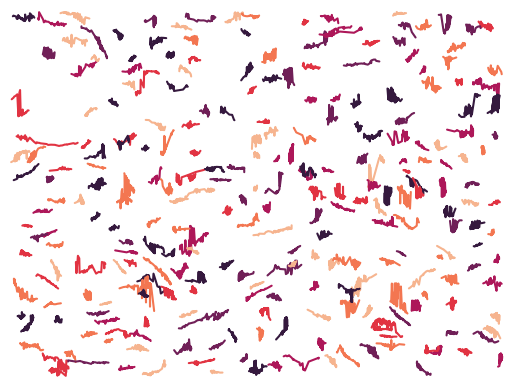

In [141]:
for track in tqdm(tracks):
    sns.lineplot(x = track.x, y = track.y)
#     sns.lineplot(x = track_614.x, y = track_614.y, color = 'green')
plt.xlim(0,1200)
plt.ylim(0,1200)
plt.axis('off')

In [144]:
pd.set_option('display.max_rows', 300)

In [156]:
# create df for filtered tracks
df = pd.DataFrame({'Track length': [len(track) 
                                    for track in tracks],
                   'Finishing coordinates (XY)': [(int(track.x[-1]), int(track.y[-1])) 
                                                   for track in tracks], 
                   'delta Area': [track.properties['area'][-1] - track.properties['area'][0] 
                                      for track in tracks], 
                   'delta Mtb load': [track.properties['mean_intensity-1'][-1] - track.properties['mean_intensity-1'][0] 
                                          for track in tracks], 
                   'Starting frame': [track.t[0] for track in tracks],
                   'Final frame': [track.t[-1] for track in tracks], 
                   'Track ID': [f'{track.ID}' for track in tracks], 
                   'Final Area': [track.properties['area'][-1] 
                                      for track in tracks], 
                   'Est. Cell Fate': ''})

In [ ]:
cell_fate = {298:'eff', 
             295:'mtb', 
             292:'lost', 
             286:'mtb', 
             285:'mtb'
             313:'lost',
             241:'lost',
             249:'lost',
             248:'lost',
             244:'mtb', 
             239:'lost', 
             281:'lost',
             280:'lost', 
             270:'lost', 
             423:'mtb',
             408:'lost',
             405:'lost',
             401:'lost',
             398:'dead', 
             448:'mtb',
             441:'mtb',
             396:'mtb',
             435:'lost', # minor
             360:'lost',
             356:'lost',
             355:'lost',
             351:'mtb',
             350:'lost',
             346:'lost',
             392:'lost',
             381:'lost',
             374:'lost',
             372:'lost',
             76:'mtb', # generous
             87:'lost',
             66:'follow', 
             107:'mtb', 
             106:'follow', 
             98:'lost', 
             96:'mtb',
             94:'lost', 
             22:'mtb',
             18:'lost', 
             15:'lost',
             12:'lost',
             49:'lost',
             193:'lost',
             173:'follow',
             217:'lost',
             213:'lost',
             212:'mtb',
             201:'lost',
             137:'lost',
             169:'lost',
             168:'follow',
             148:'lost',
             152:'lost', 
             483:'lost', #wd be difficult to track
             509:'lost',
             459:'lost',
             535:'mtb', 
             614:'mtb',
             620:'lost',
             664:'lost',
             638:'lost',
             716:'lost',
             717:,'lost', 
             721:'follow', #generous
             766:'lost',
             845:'lost',
             818:'lost',
             871:'mtb',
             943:'mtb',
             916:,'lost',
             914:,'mtb', 
             981:'lost',
             
            }

In [313]:
highlight_cell(981)

In [164]:
df[df['Final frame'] != 74]

,Track length,Finishing coordinates (XY),delta Area,delta Mtb load,Starting frame,Final frame,Track ID,Final Area,Est. Cell Fate
4,44,"(155, 68)",-117.0,0.000043,0,43,298,599.0,
5,64,"(332, 17)",-465.0,0.000062,0,63,295,595.0,
7,37,"(212, 51)",897.0,0.001833,0,36,292,1986.0,
8,67,"(1035, 91)",-1695.0,0.000059,0,67,286,657.0,
9,57,"(1007, 109)",-729.0,0.000056,0,57,285,618.0,
18,64,"(116, 203)",-885.0,-0.000424,0,63,313,1341.0,
19,42,"(422, 169)",1367.0,0.000321,0,41,241,1909.0,
21,65,"(608, 214)",-728.0,-0.000121,0,64,249,560.0,
22,50,"(845, 255)",-448.0,0.000487,0,50,248,898.0,
24,62,"(37, 162)",273.0,-0.000202,0,61,244,1276.0,


In [165]:
df[df['Track ID'] == '441']

,Track length,Finishing coordinates (XY),delta Area,delta Mtb load,Starting frame,Final frame,Track ID,Final Area,Est. Cell Fate
51,74,"(27, 418)",-980.0,0.000012,0,73,441,720.0,


In [166]:
track_441 = [track for track in tracks if track.ID == 441][0]

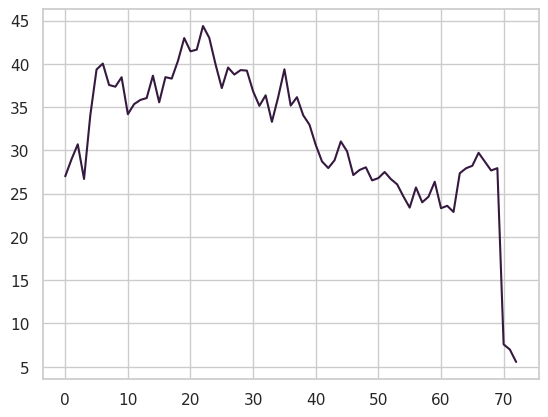

In [163]:
plt.plot(track_423.properties['mean_intensity-1']*track_423.properties['area'])

In [153]:
970 - 4711

-3741

<AxesSubplot:xlabel='delta Area', ylabel='Count'>

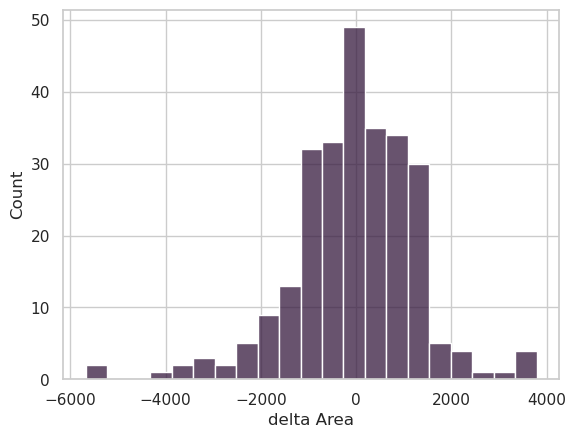

In [84]:
sns.histplot(df['delta Area'])

<AxesSubplot:xlabel='Final Area', ylabel='Count'>

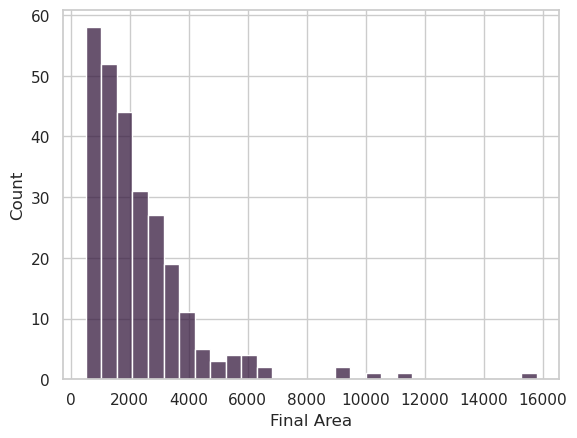

In [83]:
sns.histplot(df['Final Area'])

In [47]:
df[0:100]

,Track length,Finishing coordinates (TXY),delta Area,delta Mtb load,Starting frame,Track ID
0,75,"(74, 197, 628)",-955.0,-0.000056,0,311
1,75,"(74, 993, 33)",-482.0,-0.000119,0,307
2,75,"(74, 1189, 67)",693.0,0.000021,0,304
3,73,"(74, 133, 24)",771.0,-0.000057,0,303
4,44,"(43, 155, 68)",117.0,-0.000043,0,298
...,...,...,...,...,...,...
95,40,"(39, 639, 789)",815.0,-0.000031,0,94
96,75,"(74, 893, 793)",268.0,-0.000290,0,28
97,75,"(74, 1175, 784)",-793.0,-0.000049,0,25
98,70,"(69, 1091, 786)",3392.0,0.000154,0,22


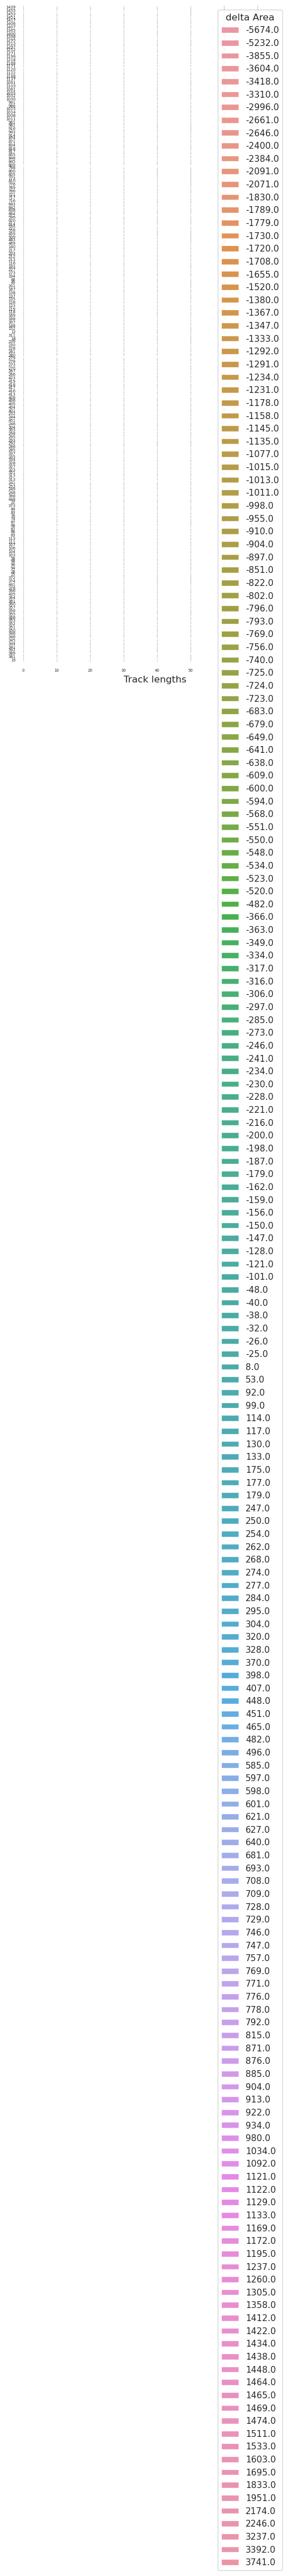

In [74]:
# import seaborn as sns
# import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
sns.set_palette('rocket')
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total lengths
sns.set_color_codes("pastel")
sns.barplot(x="Track length", y="Track ID", 
            data=df[0:200].sort_values("Starting frame", ascending=False),
#             label="Track length", 
#             color="b",
            hue='delta Area',)

# Plot the fate
# sns.set_color_codes("muted")
# sns.barplot(x="delta Mtb load", y="Track ID", 
#             data=df[0:50].sort_values("Track length", ascending=False),
#             label="Starting frame", color="b")

# # Add a legend and informative axis label
# ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(
        #xlim=(0, 74), 
       ylabel="",
       xlabel="Track lengths")
plt.tick_params(axis='both', which='major', labelsize=5)
sns.despine(left=True, bottom=True)

In [50]:
crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
18,20.5,7.175,6.765,14.965,20.090,1281.55,194.78,LA
36,19.9,6.368,5.771,18.308,18.706,881.51,178.86,OK
42,19.5,4.095,5.655,15.990,15.795,767.91,155.57,TN
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
# crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)